In [1]:
match_id = "2380"

In [2]:
import MatchStats as ms
import pandas as pd

In [3]:
df = ms.get_map_summary_data(match_id)

In [4]:
df.head()

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
0,2018-01-11,Junkertown,1,Escort,2380,DAL,SEO,Team A
1,2018-01-11,Temple of Anubis,2,Assault,2380,DAL,SEO,Team B
2,2018-01-11,Ilios,3,KOTH,2380,DAL,SEO,Team B
3,2018-01-11,Numbani,4,Hybrid,2380,DAL,SEO,Tie


# Get info from all matches

In [5]:
import time
from bs4 import BeautifulSoup
from pprint import pprint
import requests

In [6]:
MATCH_LIST_URL = "https://www.winstonslab.com/events/event.php?id=86#matches"

In [7]:
response = requests.get(MATCH_LIST_URL)
html = BeautifulSoup(response.text, "lxml")

In [8]:
past_div = html.find("div", {"id": "past"})
table_body = past_div.find("table").find("tbody")
rows = table_body.findAll("tr")

## Going through single matches

In [9]:
df_list = []

In [10]:
for row in rows:
    match_link = row.td.a
    match_id = match_link.attrs["href"].split("=")[-1]
    df_list.append(ms.get_map_summary_data(match_id))

In [11]:
full_df = pd.concat(df_list)
full_df.head()

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
0,2018-03-04,Hanamura,1,Assault,2472,SHD,SFS,Team B
1,2018-03-04,Nepal,2,KOTH,2472,SHD,SFS,Team B
2,2018-03-04,King's Row,3,Hybrid,2472,SHD,SFS,Team B
3,2018-03-04,Watchpoint: Gibraltar,4,Escort,2472,SHD,SFS,Team B
0,2018-03-03,Volskaya Industries,1,Assault,2471,HOU,NYE,Team B


In [12]:
full_df["Team A"].value_counts()

HOU    35
SHD    34
DAL    33
GLA    33
SEO    31
PHI    31
NYE    30
BOS    30
VAL    29
SFS    28
LDN    25
FLA    25
Name: Team A, dtype: int64

In [13]:
full_df["Team B"].value_counts()

LDN    45
NYE    35
FLA    32
PHI    31
BOS    30
HOU    30
SFS    30
VAL    29
SEO    28
DAL    25
GLA    25
SHD    24
Name: Team B, dtype: int64

In [14]:
map_count = pd.DataFrame(full_df["Map Name"].value_counts()).rename_axis('Map').reset_index()
map_count["Count"] = map_count["Map Name"]
map_count["Map Name"] = map_count["Map"]
map_count.drop(["Map"],axis=1, inplace=True)

In [15]:
map_count.head()

,Map Name,Count
0,Ilios,34
1,Dorado,32
2,Oasis,31
3,Temple of Anubis,31
4,Horizon Lunar Colony,31


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [17]:
sns.set_style("dark")
#sns.set_palette("bright")

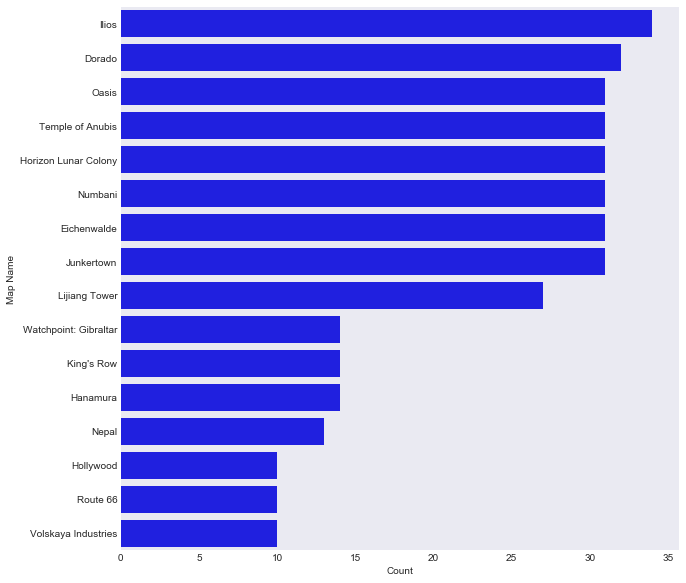

In [18]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="Count", y="Map Name", data=map_count,
            label="Total", color="b")

In [19]:
full_df.to_csv("Match Summary Data.csv")